In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [51]:
dataset = pd.read_csv("winequality.csv")


In [52]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


# Check if there are any null values

In [53]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

In [54]:
dataset['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

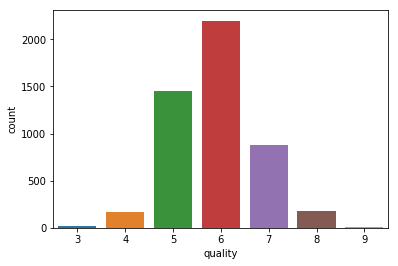

In [55]:
sns.countplot(x='quality',data=dataset)

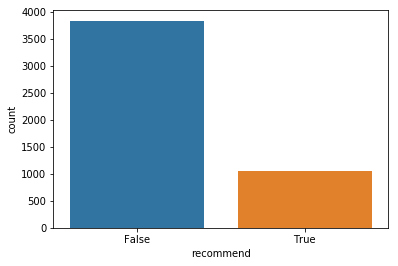

In [56]:
sns.countplot(x='recommend',data=dataset)

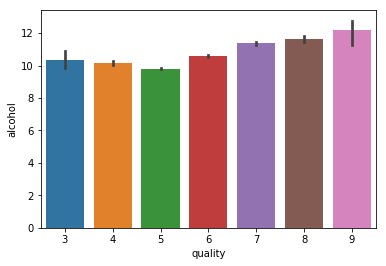

In [102]:
sns.barplot(x='quality',y='alcohol',data=dataset)

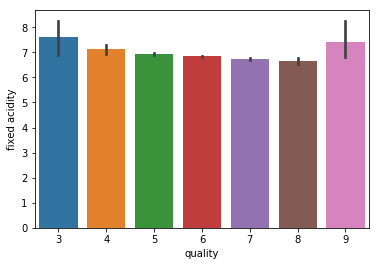

In [103]:
sns.barplot(x='quality',y='fixed acidity',data=dataset)

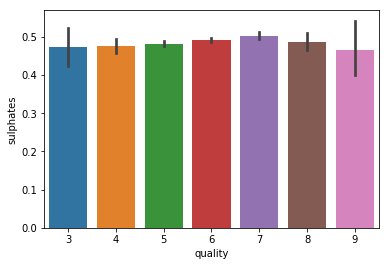

In [104]:
sns.barplot(x='quality',y='sulphates',data=dataset)

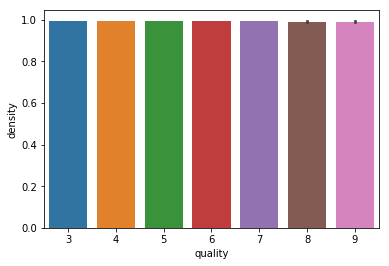

In [105]:
sns.barplot(x='quality',y='density',data=dataset)

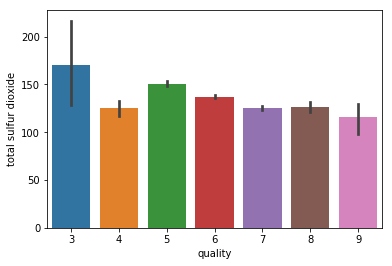

In [106]:
sns.barplot(x='quality',y='total sulfur dioxide',data=dataset)

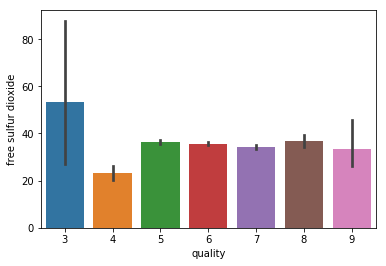

In [107]:
sns.barplot(x='quality',y='free sulfur dioxide',data=dataset)

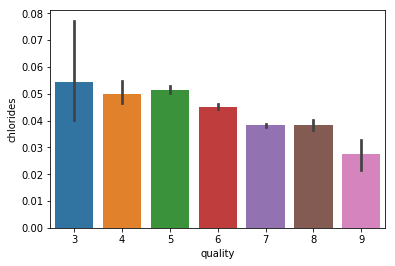

In [108]:
sns.barplot(x='quality',y='chlorides',data=dataset)

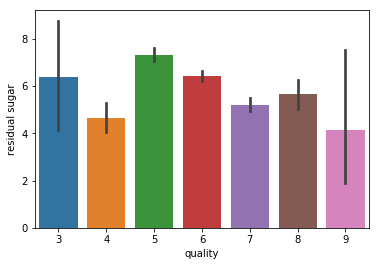

In [109]:
sns.barplot(x='quality',y='residual sugar',data=dataset)

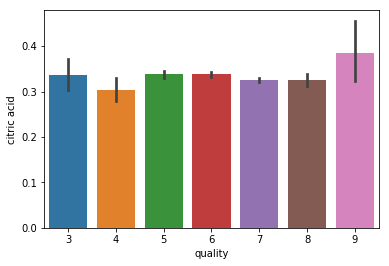

In [110]:
sns.barplot(x='quality',y='citric acid',data=dataset)

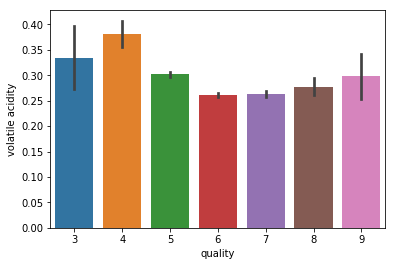

In [111]:
sns.barplot(x='quality',y='volatile acidity',data=dataset)

## Correlation between each attribute and quality feature


In [60]:
correlations=dataset.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
recommend               0.769486
Name: quality, dtype: float64


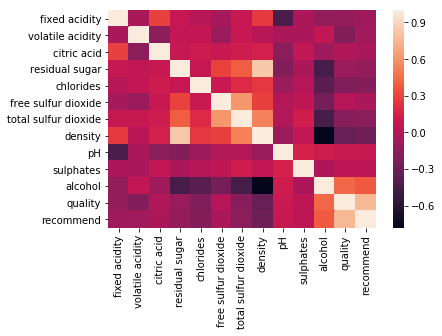

In [61]:
sns.heatmap(dataset.corr())
plt.show()

In [115]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [63]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [29]:
x=dataset.iloc[:,:-2].values
y=dataset.iloc[:,12].values


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3673, 11)
(3673,)
(1225, 11)
(1225,)


In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = classifier.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accs=accuracy_score(y_test,y_pred)

In [68]:
cm

array([[911,  28],
       [215,  71]], dtype=int64)

In [71]:
accs

0.8016326530612244

## The model gives 80% of accuracy.